In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("ADANIPORTS_TRAIN.csv")
dataset_train.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
dataset_train.drop(dataset_train.columns[[1,2,3,7,9,11,12,13,14]], axis=1, inplace=True)
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,2007-11-27,770.00,1050.00,770.0,962.90,27294366
1,2007-11-28,984.00,990.00,874.0,893.90,4581338
2,2007-11-29,909.00,914.75,841.0,884.20,5124121
3,2007-11-30,890.00,958.00,890.0,921.55,4609762
4,2007-12-03,939.75,995.00,922.0,969.30,2977470


In [4]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[770.  ]
 [984.  ]
 [909.  ]
 ...
 [698.  ]
 [703.05]
 [705.  ]]
(3303, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.55063423],
       [0.72863381],
       [0.66625078],
       ...,
       [0.49074652],
       [0.49494697],
       [0.49656893]])

In [6]:
X_train=[]
y_train=[]
for i in range(40,training_set.shape[0]):
    X_train.append(scaled_training_set[i-40:i,0])
    y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(3263, 40)
(3263,)


In [7]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(3263, 40, 1)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
regressor=Sequential()
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [10]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train,y_train, epochs=25,batch_size=16)

Epoch 1/25
204/204 [==============================] - 14s 39ms/step - loss: 0.0043
Epoch 2/25
204/204 [==============================] - 12s 59ms/step - loss: 0.0020
Epoch 3/25
204/204 [==============================] - 13s 64ms/step - loss: 0.0018
Epoch 4/25
204/204 [==============================] - 13s 66ms/step - loss: 0.0016
Epoch 5/25
204/204 [==============================] - 12s 58ms/step - loss: 0.0012
Epoch 6/25
204/204 [==============================] - 13s 65ms/step - loss: 0.0012
Epoch 7/25
204/204 [==============================] - 12s 59ms/step - loss: 0.0012
Epoch 8/25
204/204 [==============================] - 11s 56ms/step - loss: 0.0011
Epoch 9/25
204/204 [==============================] - 12s 61ms/step - loss: 9.6493e-04
Epoch 10/25
204/204 [==============================] - 12s 58ms/step - loss: 9.3711e-04
Epoch 11/25
204/204 [==============================] - 15s 72ms/step - loss: 8.7963e-04
Epoch 12/25
204/204 [==============================] - 12s 61ms/step - lo

In [11]:
dataset_test=pd.read_csv("ADANIPORTS_TEST.csv")
dataset_test.drop(dataset_test.columns[[1,2,3,7,9,11,12,13,14]], axis=1, inplace=True)
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-01,684.60,704.65,673.30,692.90,11600468
1,2021-03-02,697.60,724.70,696.00,720.50,11486477
2,2021-03-03,732.00,754.95,723.40,729.85,19961472
3,2021-03-04,733.25,765.70,715.85,752.45,30607959
4,2021-03-05,752.45,761.00,730.50,748.95,17665200


In [12]:
actual_stock_price=dataset_test.iloc[:,1:2].values

In [13]:
dataset_test.shape

(40, 6)

In [14]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(40,40+dataset_test.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [15]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

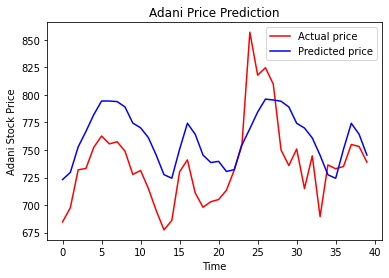

In [17]:
plt.plot(actual_stock_price,color='red',label='Actual price')
plt.plot(predicted_stock_price,color='blue',label='Predicted price')
plt.title('Adani Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adani Stock Price')
plt.legend()